# Standard imports

In [464]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# California Dataset

## Exploratory Data Analysis

### Storing and reading the data

In [465]:
california_data = pd.read_csv('California_Houses.csv')
california_data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [466]:
california_data.drop(['Latitude', 'Longitude'], axis = 1, inplace=True)
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Distance_to_coast         20640 non-null  float64
 8   Distance_to_LA            20640 non-null  float64
 9   Distance_to_SanDiego      20640 non-null  float64
 10  Distance_to_SanJose       20640 non-null  float64
 11  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.9 MB


In [467]:
california_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05
Distance_to_LA,20640.0,269421.981646,247732.446134,420.589109,32111.253908,173667.461747,527156.235384,1.018260e+06
Distance_to_SanDiego,20640.0,398164.933494,289400.563735,484.917973,159426.394646,214739.830318,705795.399035,1.196919e+06


In [468]:
california_data.corr()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,1.000000,0.197672,0.214531,-0.077524,-0.068248
Distance_to_LA,-0.130678,-0.065421,-0.031435,-0.019777,-0.055809,-0.110407,-0.062118,0.197672,1.000000,0.951459,-0.794024,-0.848657
Distance_to_SanDiego,-0.092510,-0.055253,0.036113,-0.038935,-0.067627,-0.109691,-0.069091,0.214531,0.951459,1.000000,-0.887636,-0.927850


In [469]:
california_data.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

### Representing initial data

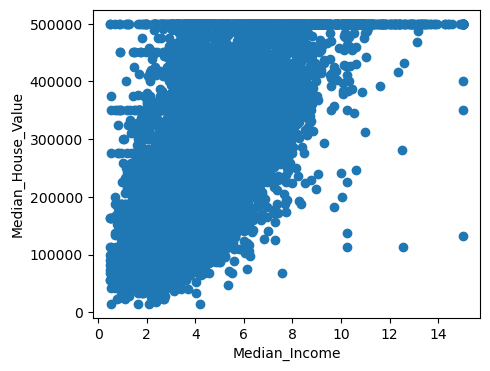

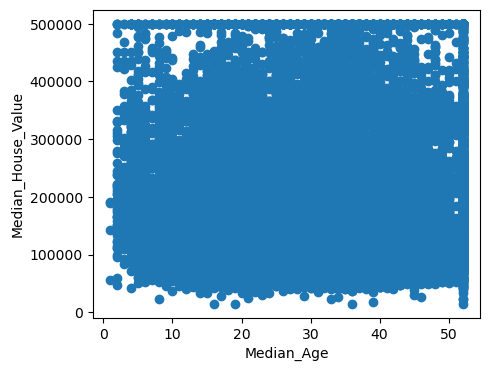

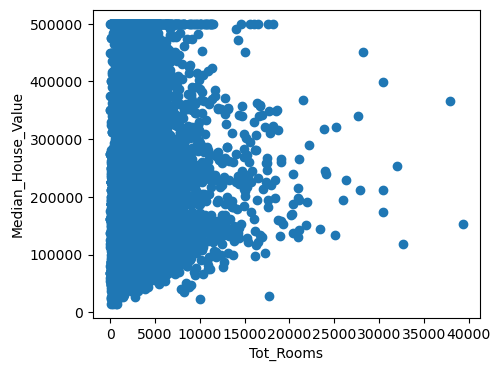

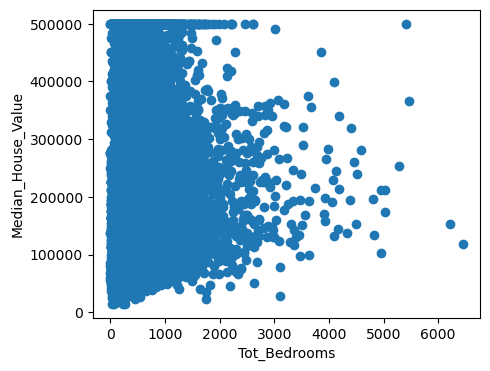

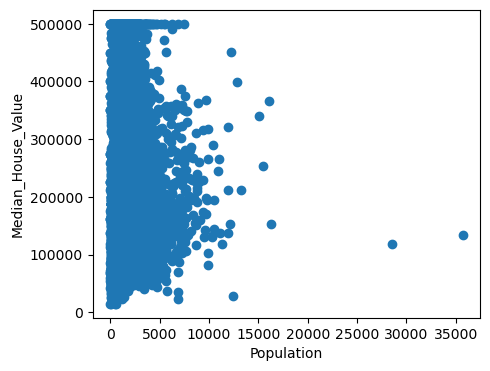

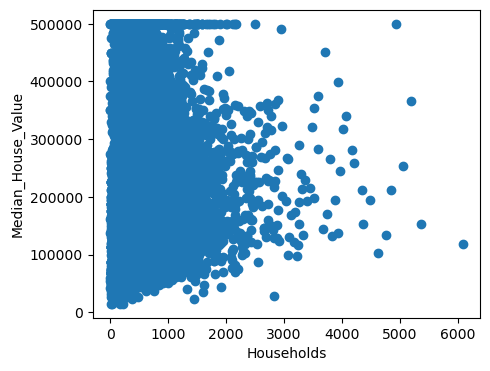

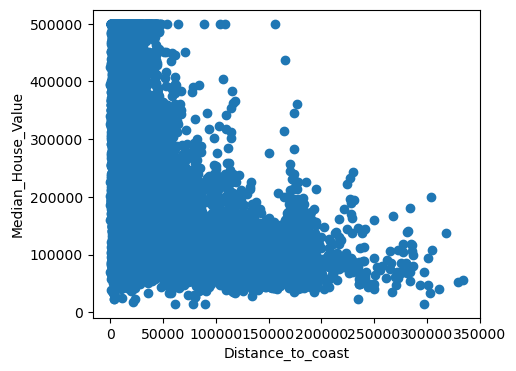

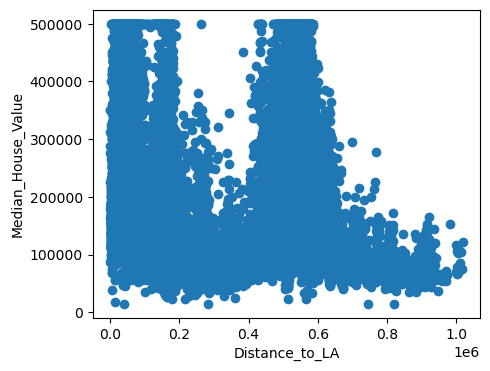

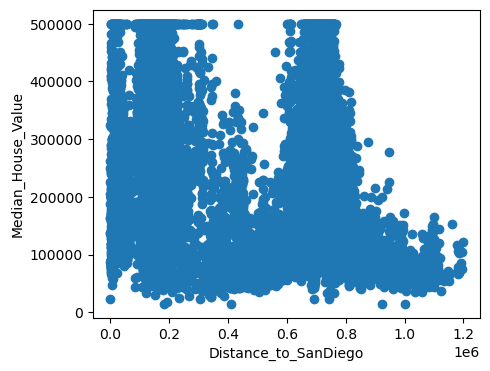

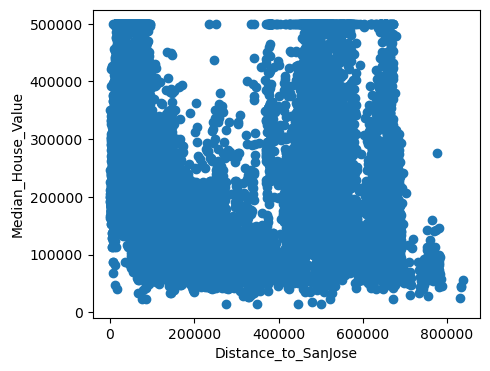

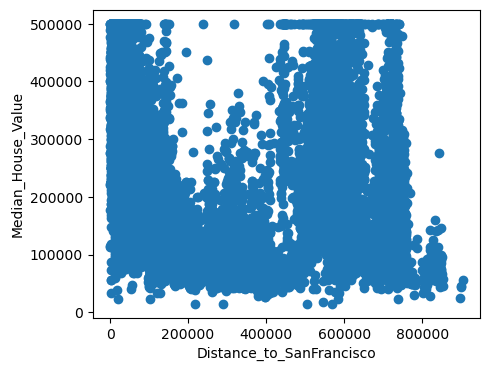

In [470]:
for feature in california_data:
    if feature != 'Median_House_Value':
        plt.figure(figsize=(5, 4));
        plt.scatter(california_data[feature], california_data['Median_House_Value']);
        plt.ylabel('Median_House_Value');
        plt.xlabel(feature);
    plt.show();

### Separating the data into two separate tables to show the target column

In [471]:
X_california = california_data.drop('Median_House_Value', axis=1)
y_california = california_data['Median_House_Value']

## Feature Scaling and PCA

[3.71110398e-01 3.21410994e-01 1.17396182e-01 9.50103112e-02
 5.11889349e-02 2.15417275e-02 1.27873606e-02 5.41245836e-03
 2.44953831e-03 1.35047901e-03 3.41615412e-04]
0.9561168207945089


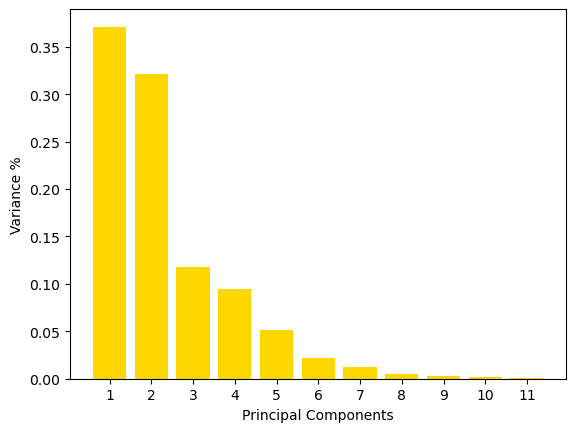

In [472]:
X_california = StandardScaler().fit_transform(X_california)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_california)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_california)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

### Testing and Training the data

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_california, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (16512, 5)
Testing  Shape:  (4128, 5)


## Evaluation Score Function

In [474]:
def eval(y_test, predictions, results=[]):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    results = [mae, rmse, r2]
    print("Mean Absolute Error: ", round(mae, 5))
    print("Root Mean Squared Error: ", round(rmse, 5))
    print("R-squared (R2) Score:", round(r2, 5))
    return results

## Performing Linear Regression

### Model fitting and predictions

In [475]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.589178321708208
Testing R^2 Score: 0.6004633084659551


### Data representation

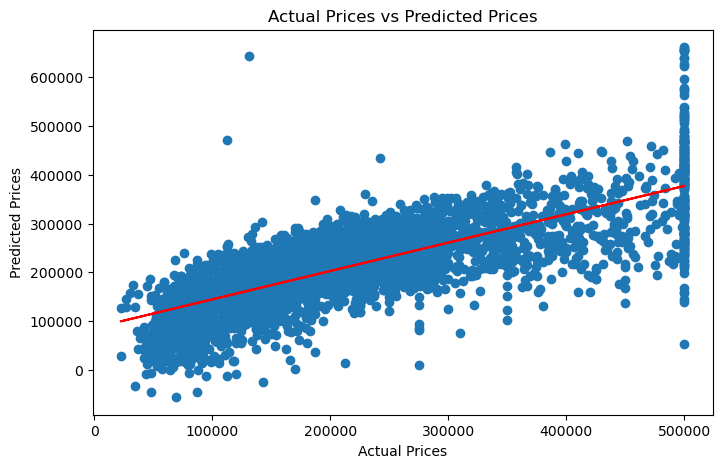

In [476]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b, color='red')
plt.show()

Text(0, 0.5, 'Median_House_Value')

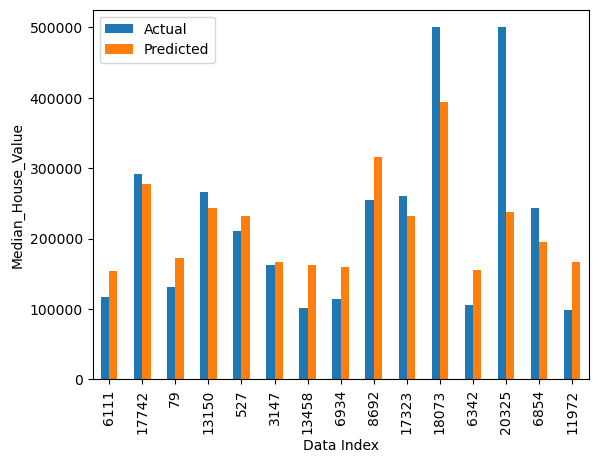

In [477]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("Median_House_Value")

### Model Evaluation

In [478]:
results = []
lm = eval(y_test, predictions, results)

Mean Absolute Error:  55532.98439
Root Mean Squared Error:  74654.49229
R-squared (R2) Score: 0.60046


## Performing Random Forest

### Model fitting and predictions

In [479]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.9549895013528445
Testing R^2 Score: 0.6929745909621595


### Data representation

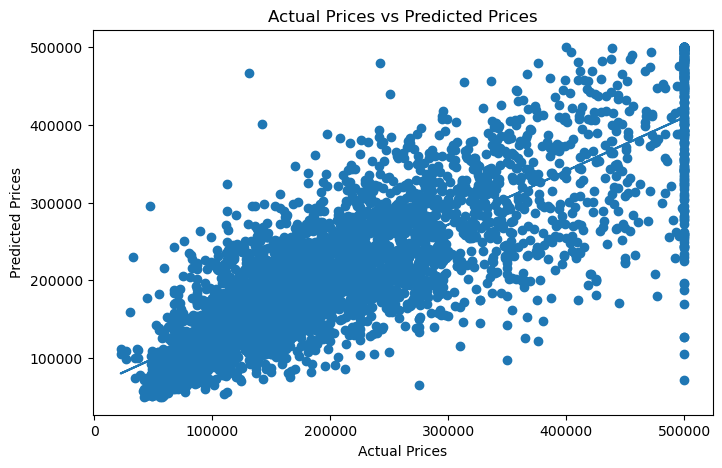

In [480]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'Median_House_Value')

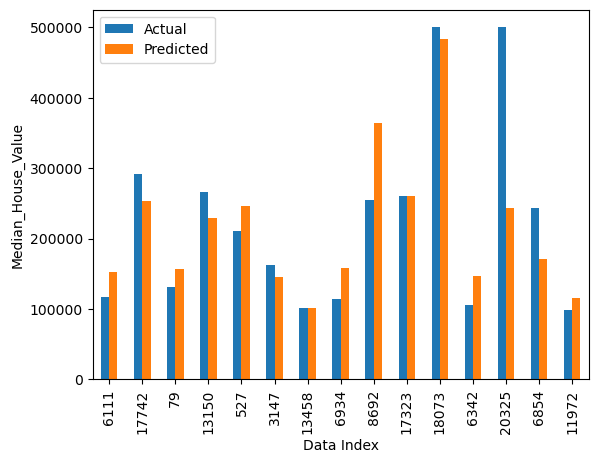

In [481]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("Median_House_Value")

### Model Evaluation

In [482]:
rfr = eval(y_test, predictions, results)

Mean Absolute Error:  45655.80882
Root Mean Squared Error:  65443.23678
R-squared (R2) Score: 0.69297


## Performing Gradient Boost

### Model fitting and predictions

In [483]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)

Training R^2 Score: 0.6862339231364656
Testing R^2 Score: 0.680836696110585


### Data representation

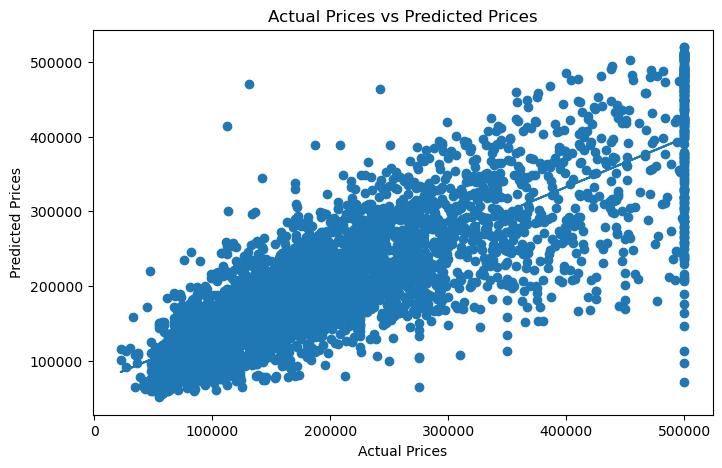

In [484]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test,predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m*y_test + b)
plt.show()

Text(0, 0.5, 'Median_House_Value')

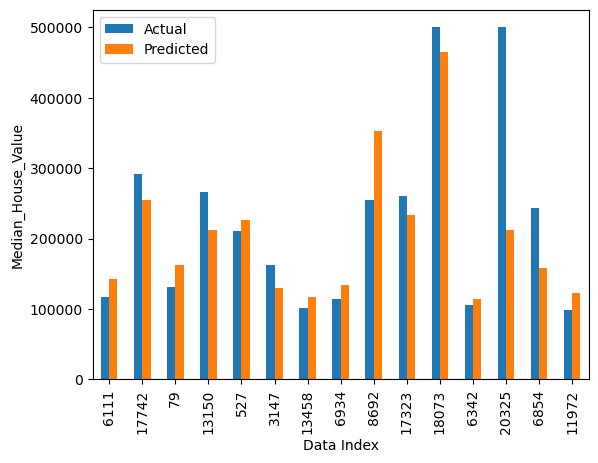

In [485]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result = result.head(15)
result.plot(kind='bar')
plt.xlabel("Data Index")
plt.ylabel("Median_House_Value")

### Model Evaluation

In [486]:
gbr = eval(y_test, predictions, results)

Mean Absolute Error:  47409.38408
Root Mean Squared Error:  66724.30945
R-squared (R2) Score: 0.68084


## Dealing with Outliers

### IQR Method

In [487]:
column_names = ["Median_House_Value", "Median_Income", "Median_Age", "Tot_Rooms", 
                "Tot_Bedrooms", "Population", "Households",  "Distance_to_coast", 
                "Distance_to_LA", "Distance_to_SanDiego", "Distance_to_SanJose", 
                "Distance_to_SanFrancisco"]

In [488]:
Q1 = california_data[column_names].quantile(0.25)
Q3 = california_data[column_names].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (california_data[column_names] < lower_bound) | (california_data[column_names] > upper_bound)
california_data_no_outliers = california_data[~outliers.any(axis=1)]
print(california_data_no_outliers.shape)

(15406, 12)


In [489]:
X_california = california_data_no_outliers.drop('Median_House_Value', axis=1)
y_california = california_data_no_outliers['Median_House_Value']

In [490]:
X_california = StandardScaler().fit_transform(X_california)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_california)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_california)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[3.54117889e-01 3.24696962e-01 1.10684339e-01 1.06056069e-01
 5.69545969e-02 2.21714067e-02 1.53523476e-02 5.72269069e-03
 2.47263049e-03 1.42361109e-03 3.47457784e-04]
0.9525098556094725


In [491]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_california, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (12324, 5)
Testing  Shape:  (3082, 5)


In [492]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  49298.74917
Root Mean Squared Error:  63392.35291
R-squared (R2) Score: 0.50379


In [493]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  44646.88227
Root Mean Squared Error:  60040.77964
R-squared (R2) Score: 0.55488


In [494]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_iqr = eval(y_test, predictions, results)

Mean Absolute Error:  45974.48249
Root Mean Squared Error:  60113.8335
R-squared (R2) Score: 0.55379


### Outlier Capping Method

In [495]:
california_data_no_outliers = california_data.copy()
for col in column_names:
    california_data_no_outliers[col] = california_data[col].clip(lower_bound[col], upper_bound[col])
print(california_data_no_outliers.shape)

(20640, 12)


In [496]:
X_california = california_data_no_outliers.drop('Median_House_Value', axis=1)
y_california = california_data_no_outliers['Median_House_Value']

In [497]:
X_california = StandardScaler().fit_transform(X_california)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_california)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_california)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[3.70734179e-01 3.20018101e-01 1.20236531e-01 9.73179463e-02
 4.77339198e-02 2.22067454e-02 1.29771804e-02 4.52746980e-03
 2.42434033e-03 1.47780245e-03 3.45784626e-04]
0.9560406770311987


In [498]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_california, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

X_Cap_train = X_train
X_Cap_test = X_test
y_Cap_train = y_train
y_Cap_test = y_test

Training Shape:  (16512, 5)
Testing  Shape:  (4128, 5)


In [499]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_cap = eval(y_test, predictions, results)

Mean Absolute Error:  53796.05395
Root Mean Squared Error:  71303.04404
R-squared (R2) Score: 0.62086


In [500]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  45434.39787
Root Mean Squared Error:  64361.35999
R-squared (R2) Score: 0.69109


In [501]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_cap = eval(y_test, predictions, results)

Mean Absolute Error:  47270.23766
Root Mean Squared Error:  65553.41912
R-squared (R2) Score: 0.67954


### Z Score Method

In [502]:
california_data_no_outliers = california_data.copy()
z_scores = (california_data[column_names] - california_data[column_names].mean()) / california_data[column_names].std()

threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

california_data_no_outliers = california_data[~outliers.any(axis=1)]
print(california_data_no_outliers.shape)

(19497, 12)


In [503]:
X_california = california_data_no_outliers.drop('Median_House_Value', axis=1)
y_california = california_data_no_outliers['Median_House_Value']

In [504]:
X_california = StandardScaler().fit_transform(X_california)
pca = PCA(n_components=None)

X_pca = pca.fit_transform(X_california)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_california)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

[3.61273434e-01 3.23412095e-01 1.17222519e-01 9.93885958e-02
 5.07745273e-02 2.24379848e-02 1.52205604e-02 5.80202212e-03
 2.47255079e-03 1.65263557e-03 3.43075805e-04]
0.9520711705812643


In [505]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_california, test_size=0.2, random_state=20)
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (15597, 5)
Testing  Shape:  (3900, 5)


In [506]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

lm_z = eval(y_test, predictions, results)

Mean Absolute Error:  54647.91556
Root Mean Squared Error:  74094.47891
R-squared (R2) Score: 0.55164


In [507]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

rfr_z = eval(y_test, predictions, results)

Mean Absolute Error:  47217.14848
Root Mean Squared Error:  67632.17268
R-squared (R2) Score: 0.62644


In [508]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

gbr_z = eval(y_test, predictions, results)

Mean Absolute Error:  48812.54088
Root Mean Squared Error:  68756.44809
R-squared (R2) Score: 0.61392


## Hyperparameter Tuning

### Random Search CV

Since Capping performed the best for outliers, we chose it here

In [509]:
X_train = X_Cap_train
X_test = X_Cap_test
y_train = y_Cap_train
y_test = y_Cap_test
print('Training Shape: ',X_train.shape)
print('Testing  Shape: ',X_test.shape)

Training Shape:  (16512, 5)
Testing  Shape:  (4128, 5)


In [510]:
rf = RandomForestRegressor()

param_dist = {
    'n_estimators': randint(10, 100),  
    'max_depth': randint(1, 10),        
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)  
}

rscv = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

rscv.fit(X_train, y_train)

print("Best Parameters:", rscv.best_params_)

predictions = rscv.best_estimator_.predict(X_test)
rscv_rfr = eval(y_test, predictions, results)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 33}
Mean Absolute Error:  46397.60615
Root Mean Squared Error:  65078.98196
R-squared (R2) Score: 0.68416


## Summary

In [511]:
model_metrics_dict = {
    'Linear': lm,
    'Random Forest': rfr,
    'Gradient Boost': gbr,
    'Linear(IQR)': lm_iqr,
    'Random Forest(IQR)': rfr_iqr,
    'Gradient Boost(IQR)': gbr_iqr,
    'Linear(Cap)': lm_cap,
    'Random Forest(Cap)': rfr_cap,
    'Gradient Boost(Cap)': gbr_cap,
    'Linear(Z-Score)': lm_z,
    'Random Forest(Z-Score)': rfr_z,
    'Gradient Boost(Z-Score)': gbr_z,
    'Random Forest(RSCV)': rscv_rfr,
}

model_names = []
mae_values = []
rmse_values = []
r2_values = []

for model_name, metrics in model_metrics_dict.items():
    model_names.append(model_name)
    mae_values.append(metrics[0])
    rmse_values.append(metrics[1])
    r2_values.append(metrics[2])

model_metrics = pd.DataFrame({
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R2': r2_values
})

print(model_metrics)

                      Model           MAE          RMSE        R2
0                    Linear  55532.984395  74654.492294  0.600463
1             Random Forest  45655.808815  65443.236777  0.692975
2            Gradient Boost  47409.384081  66724.309450  0.680837
3               Linear(IQR)  49298.749167  63392.352908  0.503795
4        Random Forest(IQR)  44646.882274  60040.779643  0.554877
5       Gradient Boost(IQR)  45974.482492  60113.833501  0.553793
6               Linear(Cap)  53796.053955  71303.044042  0.620858
7        Random Forest(Cap)  45434.397872  64361.359988  0.691087
8       Gradient Boost(Cap)  47270.237662  65553.419120  0.679538
9           Linear(Z-Score)  54647.915557  74094.478915  0.551642
10   Random Forest(Z-Score)  47217.148479  67632.172675  0.626441
11  Gradient Boost(Z-Score)  48812.540875  68756.448093  0.613918
12      Random Forest(RSCV)  46397.606152  65078.981963  0.684160


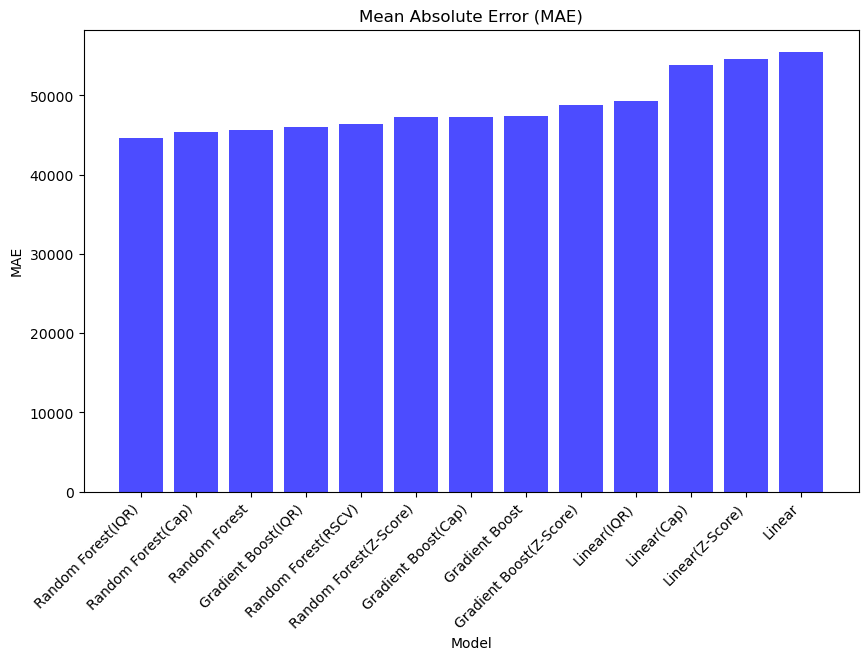

In [512]:
model_metrics_sorted = model_metrics.sort_values(by='MAE', ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['MAE'], color='blue', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.show()

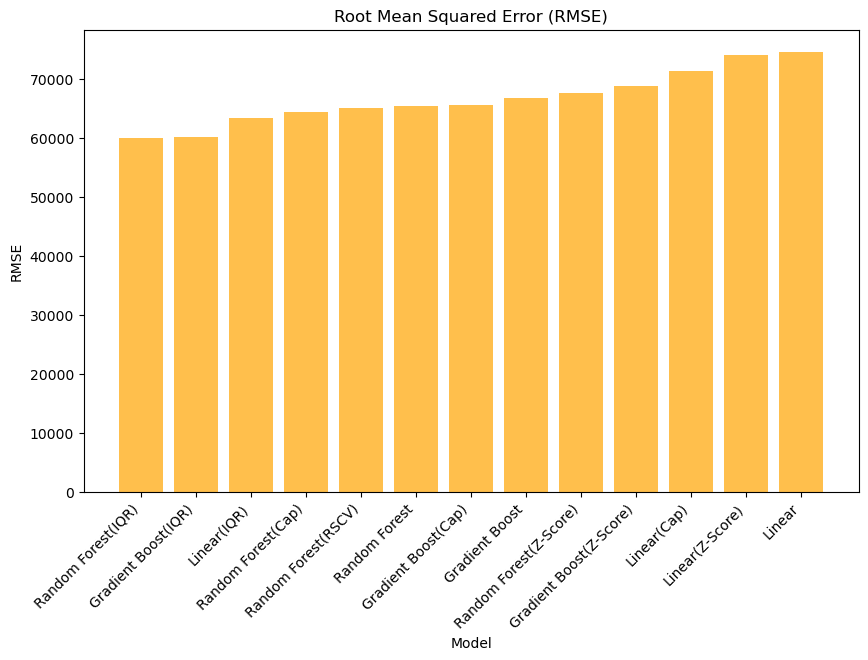

In [513]:
model_metrics_sorted = model_metrics.sort_values(by='RMSE', ascending=True)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['RMSE'], color='orange', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.show()

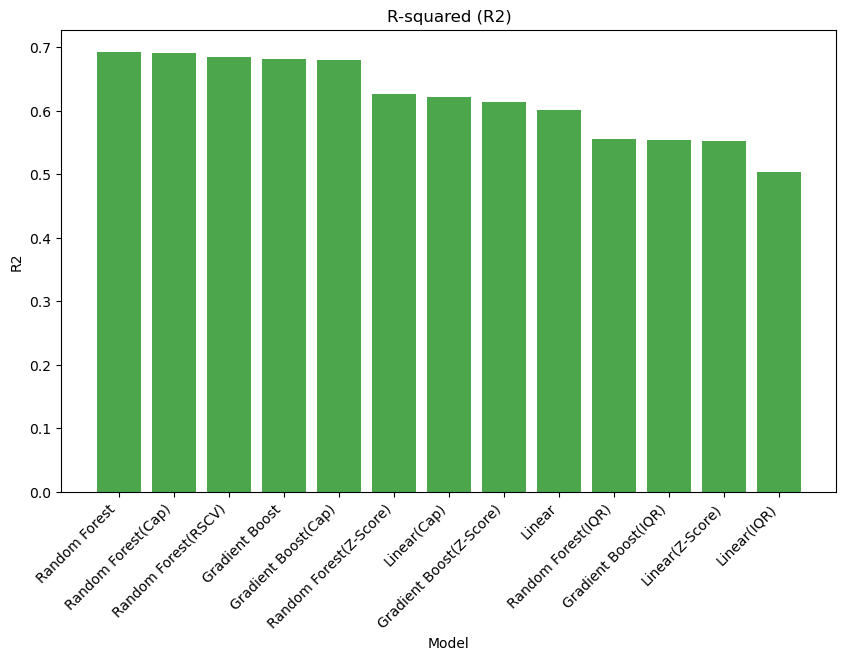

In [514]:
model_metrics_sorted = model_metrics.sort_values(by='R2', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(model_metrics_sorted['Model'], model_metrics_sorted['R2'], color='green', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('R2')
plt.title('R-squared (R2)')
plt.xticks(rotation=45, ha='right')
plt.show()